In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [93]:
path = "/home/trgknng/ros2_ws/src/cfar_cpp/Analysis/19feb_cfar_output_img/"
ping_img_path = path + "image_0809_0.png"
cfar_img_path = path + "image_0810_1.png"

ping_img = cv.imread(ping_img_path, cv.IMREAD_GRAYSCALE)
cfar_img = cv.imread(cfar_img_path, cv.IMREAD_GRAYSCALE)

print(type(cfar_img))

<class 'numpy.ndarray'>


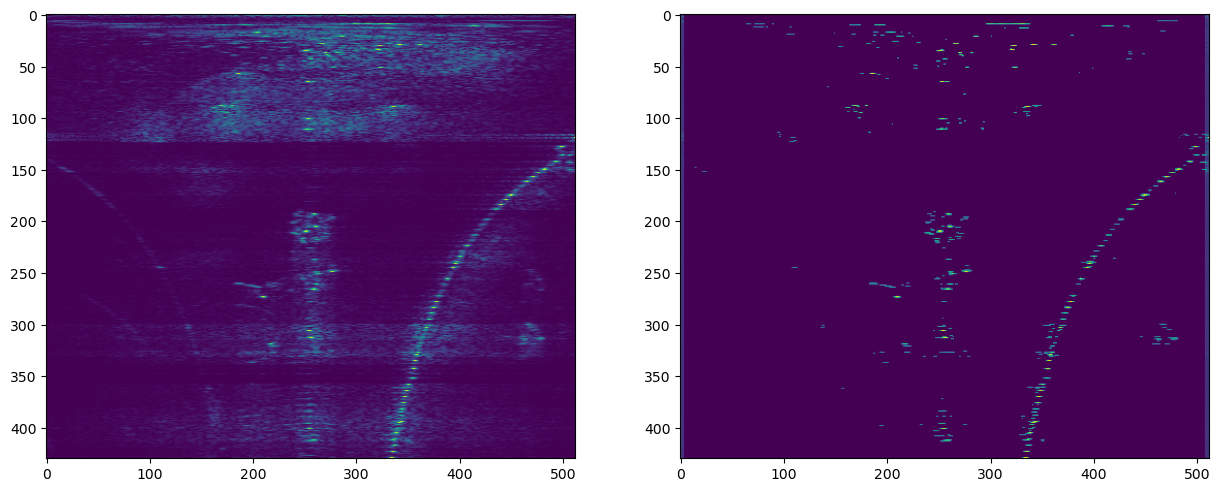

In [94]:
fig, axes = plt.subplots(1,2, figsize = (15,10))
axes[0].imshow(ping_img)
axes[1].imshow(cfar_img)

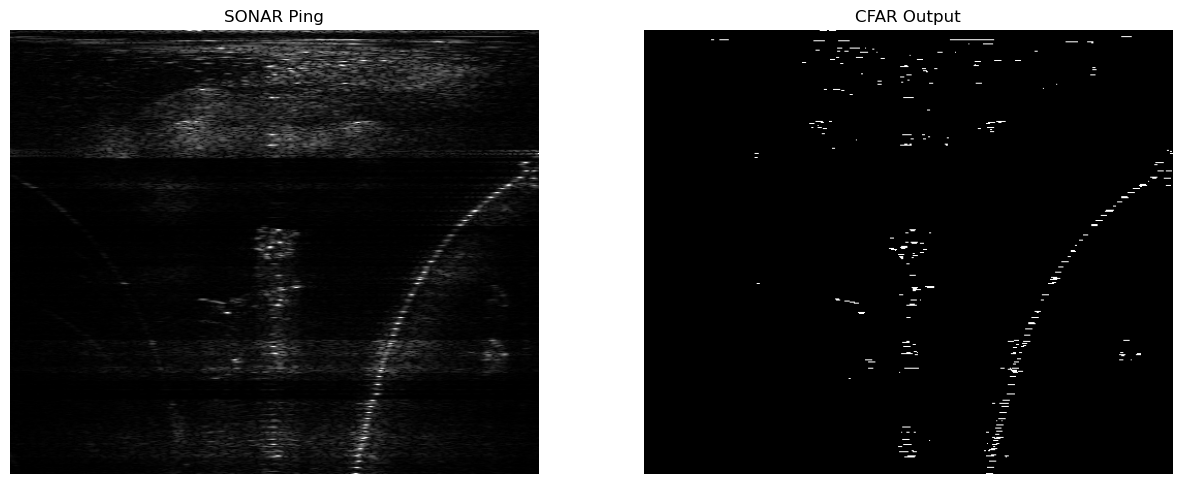

In [99]:
ping_img = cv.imread(ping_img_path, cv.IMREAD_GRAYSCALE)
cfar_img = cv.imread(cfar_img_path, cv.IMREAD_GRAYSCALE)
ret, threshold_cfar_img = cv.threshold(cfar_img, 110, 255, cv.THRESH_BINARY)
fig, axes = plt.subplots(1,2, figsize = (15,10))
axes[0].imshow(ping_img, cmap = "gray")
axes[0].axis("off")
axes[0].set_title("SONAR Ping")
# axes[1].imshow(cfar_img, cmap = "gray")
# axes[1].axis("off")
axes[1].imshow(threshold_cfar_img, cmap = "gray")
axes[1].axis("off")
axes[1].set_title("CFAR Output")

fig.savefig("parent_child_fig.png", bbox_inches="tight")

# cv.imwrite("detection_output.png", threshold_cfar_img)
# cv.imwrite("detection_input.png", ping_img)


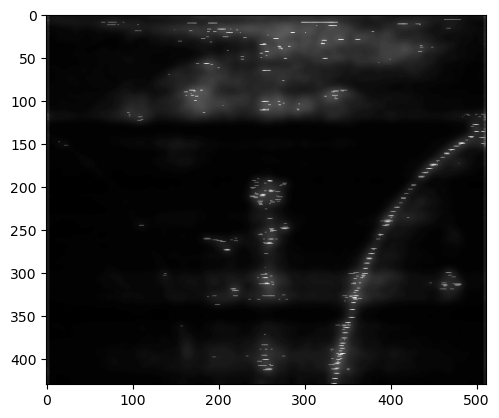

In [106]:
alpha = 0.7
beta = 1 - alpha

ping_img = cv.GaussianBlur(ping_img, (3,3), 0.0)
res = cv.addWeighted(ping_img, alpha, cfar_img, beta, 0.0)

plt.imshow(res, cmap='gray')
plt.axes = "off"
plt.savefig("weighted_parent_child_output.png", bbox_inches = "tight")
